<a href="https://colab.research.google.com/github/Ruslan26reg/NGDM-Nesterov-with-Dirichlet-Distribution/blob/main/3%20task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Bu qatorni birinchi bo'lib ishga tushiring
!pip install ultralytics opencv-python-headless

print("Kutubxonalar o'rnatildi!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 34.8 MB/s eta 0:00:00
Kutubxonalar o'rnatildi!


In [15]:
import cv2
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
from google.colab import files
import matplotlib.pyplot as plt

print("Kutubxonalar yuklandi!")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Kutubxonalar yuklandi!


In [16]:
print("YOLO modeli yuklanmoqda...")
model = YOLO('yolov8n.pt')
print("Model tayyor!")

# Aniqlash kerak bo'lgan obyektlar
target_classes = {
    0: 'Odam',
    2: 'Mashina',
    5: 'Avtobus',
    7: 'Yuk mashinasi',
    15: 'Mushuk',
    16: 'It',
    17: 'Ot'
}

# Ranglar (BGR format)
colors = {
    0: (0, 255, 0),      # Yashil - odam
    2: (255, 0, 0),      # Ko'k - mashina
    5: (255, 255, 0),    # Moviy - avtobus
    7: (0, 165, 255),    # Sariq - yuk mashinasi
    15: (255, 0, 255),   # Pushti - mushuk
    16: (0, 255, 255),   # Sariq - it
    17: (128, 0, 128)    # Binafsha - ot
}

# Ishonch darajasi
confidence_threshold = 0.5

print("Sozlamalar tayyor!")

YOLO modeli yuklanmoqda...
Model tayyor!
Sozlamalar tayyor!


In [17]:
# ===== 4-QADAM: ANIQLASH FUNKSIYASI =====
def detect_and_draw(image):
    """
    Rasmda obyektlarni topish va chizish.

    Parametrlar:
    - image: kiruvchi rasm

    Qaytaradi:
    - output: natija rasmi
    - detections: topilgan obyektlar
    """

    # YOLO bilan aniqlash
    results = model(image, verbose=False)

    # Natija rasmini tayyorlash
    output = image.copy()
    detections = []

    # Har bir topilgan obyekt
    for result in results:
        boxes = result.boxes

        for box in boxes:
            class_id = int(box.cls[0])

            # Faqat kerakli obyektlar
            if class_id in target_classes:
                confidence = float(box.conf[0])

                # Ishonch yetarli bo'lsa
                if confidence >= confidence_threshold:
                    # Koordinatalar
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    name = target_classes[class_id]
                    color = colors.get(class_id, (255,255,255))

                    # To'rtburchak chizish
                    cv2.rectangle(output, (x1,y1), (x2,y2), color, 3)

                    # Yozuv
                    label = f"{name}: {confidence*100:.0f}%"
                    (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.8, 2)
                    cv2.rectangle(output, (x1, y1-h-10), (x1+w+10, y1), color, -1)
                    cv2.putText(output, label, (x1+5, y1-5),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 2)

                    # Ro'yxatga qo'shish
                    detections.append({
                        'name': name,
                        'confidence': confidence,
                        'box': (x1, y1, x2, y2)
                    })

    return output, detections

print("Funksiya tayyor!")

Funksiya tayyor!


In [18]:
print("Rasm faylini yuklang...")

# Faylni yuklash
uploaded = files.upload()

# Yuklangan fayl nomi
filename = list(uploaded.keys())[0]
print(f"Fayl yuklandi: {filename}")

# Rasmni o'qish
image_data = np.frombuffer(uploaded[filename], np.uint8)
image = cv2.imdecode(image_data, cv2.IMREAD_COLOR)
print(f"Rasm o'lchami: {image.shape[1]}x{image.shape[0]}")

# Aniqlash
print("\nObyektlar aniqlanmoqda...")
result_image, detections = detect_and_draw(image)

# Natijalarni chop etish
print("\n" + "="*40)
print("TOPILGAN OBYEKTLAR:")
print("="*40)

if len(detections) == 0:
    print("Hech qanday obyekt topilmadi")
else:
    for i, det in enumerate(detections, 1):
        print(f"{i}. {det['name']} - {det['confidence']*100:.1f}%")

print("="*40)
print(f"Jami: {len(detections)} ta obyekt")

Rasm faylini yuklang...


Saving 475b79786817c86f34504c571d07ecc7.png to 475b79786817c86f34504c571d07ecc7.png
Fayl yuklandi: 475b79786817c86f34504c571d07ecc7.png
Rasm o'lchami: 897x607

Obyektlar aniqlanmoqda...

TOPILGAN OBYEKTLAR:
1. Avtobus - 93.6%
2. Mashina - 91.0%
3. Mashina - 87.3%
4. Mashina - 72.4%
5. Mashina - 52.0%
Jami: 5 ta obyekt


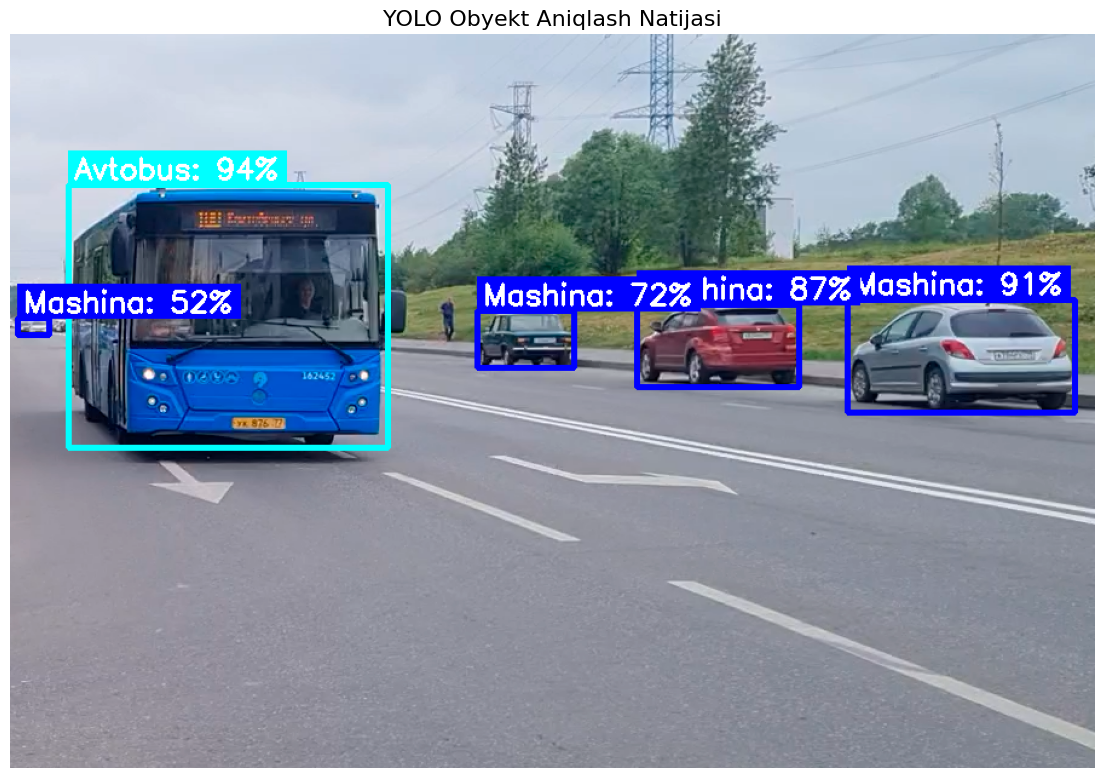

In [19]:
# BGR dan RGB ga o'tkazish (to'g'ri ranglar uchun)
result_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

# Rasmni ko'rsatish
plt.figure(figsize=(14, 10))
plt.imshow(result_rgb)
plt.title('YOLO Obyekt Aniqlash Natijasi', fontsize=16)
plt.axis('off')
plt.show()

In [20]:
# Natija rasmini saqlash
output_filename = 'natija.jpg'
cv2.imwrite(output_filename, result_image)
print(f"Natija saqlandi: {output_filename}")

# Faylni yuklab olish
files.download(output_filename)
print("Fayl yuklab olindi!")

Natija saqlandi: natija.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Fayl yuklab olindi!


In [21]:
print("Video faylini yuklang...")

# Videoni yuklash
uploaded = files.upload()
video_name = list(uploaded.keys())[0]

# Videoni ochish
cap = cv2.VideoCapture(video_name)

# Video ma'lumotlari
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f"Video: {width}x{height}, {fps:.0f} FPS, {total_frames} kadr")

# Natija videosini yaratish
output_video = cv2.VideoWriter(
    'natija_video.mp4',
    cv2.VideoWriter_fourcc(*'mp4v'),
    fps,
    (width, height)
)

# Kadrlarni qayta ishlash
max_frames = 100  # Ko'pi bilan 100 kadr
frame_count = 0

print("Video qayta ishlanmoqda...")

while frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        break

    # Aniqlash va chizish
    result_frame, _ = detect_and_draw(frame)

    # Natija videosiga yozish
    output_video.write(result_frame)

    frame_count += 1
    if frame_count % 10 == 0:
        print(f"Qayta ishlandi: {frame_count} kadr")

# Yopish
cap.release()
output_video.release()

print(f"\nTugadi! {frame_count} kadr qayta ishlandi")
print("Natija: natija_video.mp4")

# Yuklab olish
files.download('natija_video.mp4')

Video faylini yuklang...


Saving Test Video(1).mp4 to Test Video(1).mp4
Video: 1280x720, 30 FPS, 120 kadr
Video qayta ishlanmoqda...
Qayta ishlandi: 10 kadr
Qayta ishlandi: 20 kadr
Qayta ishlandi: 30 kadr
Qayta ishlandi: 40 kadr
Qayta ishlandi: 50 kadr
Qayta ishlandi: 60 kadr
Qayta ishlandi: 70 kadr
Qayta ishlandi: 80 kadr
Qayta ishlandi: 90 kadr
Qayta ishlandi: 100 kadr

Tugadi! 100 kadr qayta ishlandi
Natija: natija_video.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>